# Origen del modelo usado
### Laboratorio 3 Machine Learning: Algoritmos de Aprendizaje Supervisado

### Integrantes

- Julio Assmann
- Cristhian Solís
- César Godoy Delaigue

***Pofresor: Tomas Fontecilla  - Machine Learning - Magister DataSicence UDD***

### ***Librerias***

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Exploración de Datos (EDA)

## 1.1 Carga de los datos

Primero cargamos el dataset y verificamos la estructura de los datos.

In [3]:
# Cargar el dataset
data = load_breast_cancer()

# Crear un DataFrame
df_breast_cancer = pd.DataFrame(data.data, columns=data.feature_names)

# Agregar la columna de la variable objetivo (target)
df_breast_cancer['target'] = data.target

# Mostrar las primeras filas del dataset
df_breast_cancer.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 1.2 Revisamos la información del Dataset

Revisamos la estructura, tipos de datos y valores faltantes.

In [4]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df_breast_cancer.shape

(569, 31)

In [12]:
df_breast_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Calcular la matriz de correlación

# 2. Ingeniería de Características

## 2.1 Normalización de las características

Dado que las características numéricas tienen diferentes escalas, es necesario normalizar.

In [7]:
from sklearn.preprocessing import StandardScaler

# Separar las características y la variable objetivo
X = df_breast_cancer.drop('target', axis=1)
y = df_breast_cancer['target']

# Normalización de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para mantener la estructura
X_scaled_df = pd.DataFrame(X_scaled, columns=data.feature_names)

# Mostrar las primeras filas de los datos normalizados
X_scaled_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [8]:
from sklearn.model_selection import train_test_split

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Verificar las dimensiones de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (398, 30)
Tamaño del conjunto de prueba: (171, 30)


## 3.4 Implementación de Regresión Logística

Finalmente, aplicamos regresión logística.

Modelo guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\Tarea2\models\model.pkl
Scaler guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\Tarea2\models\scaler.pkl


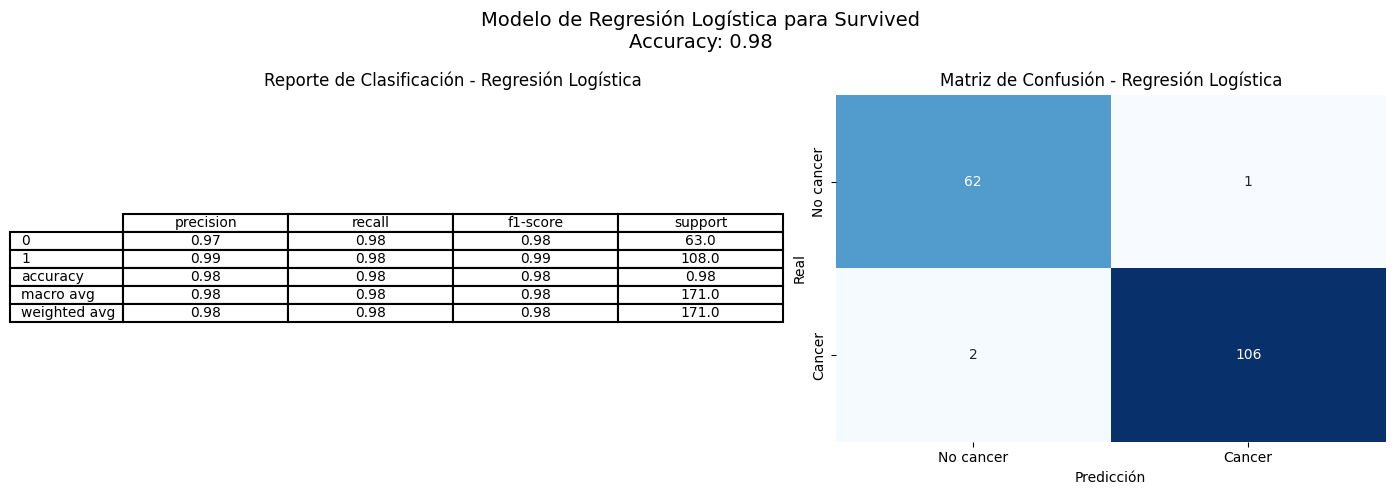

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import joblib

# Instanciar el modelo
logreg_model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
logreg_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_logreg = logreg_model.predict(X_test)

# Evaluar el modelo
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
report_df_logreg = pd.DataFrame(classification_report(y_test, y_pred_logreg, output_dict=True)).transpose().round(2)

# Guardar el modelo entrenado
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
models_dir = os.path.join(project_root, "models")
os.makedirs(models_dir, exist_ok=True)
model_path = os.path.join(models_dir, "model.pkl")
joblib.dump(logreg_model, model_path)
print(f"Modelo guardado en: {model_path}")
scaler_path = os.path.join(models_dir, "scaler.pkl")
joblib.dump(scaler, scaler_path)
print(f"Scaler guardado en: {os.path.join(models_dir, 'scaler.pkl')}")

# Resultados del modelo de Regresión Logística
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'Modelo de Regresión Logística para Survived\nAccuracy: {accuracy_logreg:.2f}', fontsize=14)

# Reporte de clasificación
ax[0].set_title("Reporte de Clasificación - Regresión Logística", fontsize=12)
ax[0].axis('off')
table_logreg = ax[0].table(cellText=report_df_logreg.values, colLabels=report_df_logreg.columns, rowLabels=report_df_logreg.index, cellLoc='center', loc='center', edges='BRTL')
table_logreg.auto_set_font_size(False)
table_logreg.set_fontsize(10)
table_logreg.scale(1.2, 1.2)
for key, cell in table_logreg.get_celld().items():
    cell.set_linewidth(1.5)

# Matriz de confusión
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues", ax=ax[1], cbar=False,
            xticklabels=['No cancer', 'Cancer'], yticklabels=['No cancer', 'Cancer'])
ax[1].set_title("Matriz de Confusión - Regresión Logística", fontsize=12)
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

### 3.4.1 Análisis de importancia de las características en la Regresión Logística

In [ ]:
# Obtener los coeficientes del modelo
coefficients = logreg_model.coef_[0]

# Crear un DataFrame para organizar los coeficientes junto con los nombres de las características
importance_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': coefficients
})

# Ordenar los coeficientes por su valor absoluto (importancia)
importance_df['Absolute Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Mostrar las 10 características más importantes
importance_df.head(10)


,Feature,Coefficient,Absolute Coefficient
21,worst texture,-1.323063,1.323063
10,radius error,-1.207227,1.207227
28,worst symmetry,-1.205759,1.205759
7,mean concave points,-1.094419,1.094419
26,worst concavity,-0.974141,0.974141
13,area error,-0.881542,0.881542
27,worst concave points,-0.835418,0.835418
20,worst radius,-0.806112,0.806112
23,worst area,-0.772227,0.772227
6,mean concavity,-0.769889,0.769889
